<a href="https://colab.research.google.com/github/SusannaPinotti/GPT-2_JOKES_GENERATION/blob/main/EXPLORATORY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import nltk 
import re 


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/JKS.csv")
data.head(30)

,Joke
0,"[me narrating a documentary about narrators] ""..."
1,Telling my daughter garlic is good for you. Go...
2,I've been going through a really rough period ...
3,"If I could have dinner with anyone, dead or al..."
4,Two guys walk into a bar. The third guy ducks.
5,Why can't Barbie get pregnant? Because Ken com...
6,Why was the musician arrested? He got in treble.
7,Did you hear about the guy who blew his entire...
8,What do you do if a bird shits on your car? Do...
9,He was a real gentlemen and always opened the ...


In [ ]:
lengths = []
for jk in data['Joke']: 
    l = len(jk)
    lengths.append(l)

#print(len(lengths))
from functools import reduce
  
def Average(lst):
    return reduce(lambda a, b: a + b, lst) / len(lst)

average = Average(lengths)
import statistics
#lunghezza media delle sequenze nel dataset:
print("Average length of the jokes =", round(average, 2))
print('StDev = ', statistics.stdev(lengths))

Average length of the jokes = 93.05
StDev =  35.25904242461935


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['Joke']= data["Joke"].map(lambda x: x.lower()) #lowercase
data['Joke']= data['Joke'].map(lambda x: re.sub('[0-9]', '', x))

In [ ]:
#remove punks, lowercase all, stopwords, tokenize 
stops = stopwords.words('english')
stops.extend(['.', '!', "'", ",", "?", "\\", "/", "'ve", "'s", "'d", '``', "*",
              ":", ";", "n't", "...","'ll","'m", "'t", "'re","[", "]", '"', "(", ")",
              'one', "can't","got", "ca n't", "get", 'ca', "''"])
def clean(text, stop): 
    tokens = word_tokenize(text)
    #remove stopwords 
    out = [t for t in tokens if t not in stop]
    return " ".join(out)

c = []
for jk in data['Joke']:
    jk = clean(jk, stops)
    c.append(jk)

clean_data = pd.DataFrame(data = c, )
clean_data.head()


,0
0,narrating documentary narrators hear saying cu...
1,telling daughter garlic good good immune syste...
2,going really rough period work week fault swap...
3,could dinner anyone dead alive would choose al...
4,two guys walk bar third guy ducks


In [ ]:
#exploratory analysis 
!pip install wordcloud
from wordcloud import WordCloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#join stirngs from c list of strings 
full_text = " ".join(c)
cloud = WordCloud(width = 600, height = 500, background_color= 'white', max_words = 1000, 
                      contour_width= 10, contour_color= "steelblue")
cloud.generate(full_text)
cloud.to_image()
cloud.to_file('/content/drive/MyDrive/jokes_project/images/word_cloud.png')

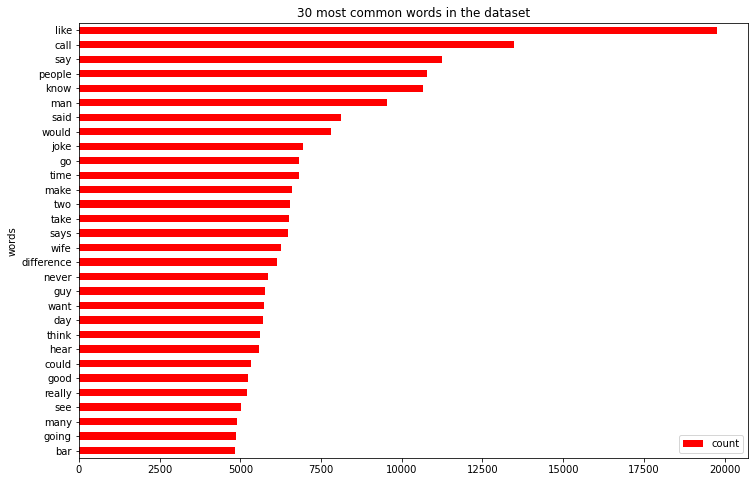

<Figure size 432x288 with 0 Axes>

In [ ]:
#terms frequency 
from collections import Counter 
cnt = Counter()

for w in full_text.split(sep = " "): 
    cnt[w] += 1 

#cnt.most_common(25)

#freq table 
word_freq = pd.DataFrame(cnt.most_common(30), columns = ['words', 'count'])
word_freq.head(30)

#plot 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

word_freq.sort_values(by='count').plot.barh(x = 'words', 
                                            y= 'count', 
                                            ax = ax, 
                                            color = 'red')
ax.set_title('30 most common words in the dataset')
plt.show()
plt.savefig("/content/drive/MyDrive/jokes_project/images/frequencies.png")

topic modeling

In [ ]:
import gensim 
from gensim.utils import simple_preprocess 

def sent_to_words(sentences): 
    for sentence in sentences: 
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

data_words = list(sent_to_words(c))

In [ ]:
data_words[5]

['barbie', 'pregnant', 'ken', 'comes', 'different', 'box', 'heyooooooo']

In [ ]:
import gensim.corpora as corpora 

#dict
id2word = corpora.Dictionary(data_words)

#corpus
texts = data_words

#tdf
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[5])

[(46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)]


In [ ]:
from pprint import pprint 

In [ ]:
#LDA model training 

num_topics = 4
lda_model = gensim.models.LdaMulticore(corpus = corpus, 
                                       id2word = id2word, 
                                       num_topics = num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e3ce531bfcc4cc68bac57ae0e96a17e1e2d71aebeb03fece33e8ba3549c5c4c3
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2dcb0178a65d63f4286732865f247066a7d749c9f6fb8e32506fd712802fb612
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyldavis sklearn


In [ ]:
import os
import pyLDAvis.gensim_models 
import pickle
import pyLDAvis
pyLDAvis.enable_notebook()

filepath = os.path.join('/content/drive/MyDrive/jokes_project/topic_mod_result'+str(num_topics))

if 1 == 1: 
    ldavis_prep = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(filepath, 'wb') as f: 
        pickle.dump(ldavis_prep, f)

with open(filepath, 'rb') as f: 
    ldavis_prep = pickle.load(f)

pyLDAvis.save_html(ldavis_prep, '/content/drive/MyDrive/jokes_project/topic_mod_result'+str(num_topics)+'.html')

ldavis_prep

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.144175 -0.067442       1        1  31.525562
0      0.086069 -0.134703       2        1  27.685574
2      0.060041  0.228350       3        1  22.389646
1     -0.290284 -0.026205       4        1  18.399219, topic_info=       Term          Freq         Total Category  logprob  loglift
98     call  13354.000000  13354.000000  Default  30.0000  30.0000
135    like  18577.000000  18577.000000  Default  29.0000  29.0000
39      bar   4694.000000   4694.000000  Default  28.0000  28.0000
244    take   6258.000000   6258.000000  Default  27.0000  27.0000
344   black   4730.000000   4730.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
1373  water    869.378823   1754.420041   Topic4  -6.0571   0.9907
530     dog   1006.196774   4084.229161   Topic4  -5.9109   0.2919
38    would    971.173847   7572.544589   Topic4  -5.9463  -0.3609
2      hear    936.898768   5547.631165   Topic4  -5.9823  -0.0857
41      guy    838.782632   5729.117303   Topic4  -6.0929  -0.2285

[305 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
68        1  0.560805  always
68        2  0.249951  always
68        3  0.154861  always
68        4  0.034414  always
1223      3  0.998016    anal
...     ...       ...     ...
38        4  0.128226   would
907       2  0.010963      yo
907       3  0.987504      yo
907       4  0.001687      yo
1357      4  0.999364     zoo

[588 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

setiment analysis

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#use the clean data for performing sent analysis
analyzer = SentimentIntensityAnalyzer()
clean_data['polarity'] = clean_data[0].apply(lambda x: analyzer.polarity_scores(x))
clean_data.head()

,0,polarity
0,narrating documentary narrators hear saying cu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,telling daughter garlic good good immune syste...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."
2,going really rough period work week fault swap...,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp..."
3,could dinner anyone dead alive would choose al...,"{'neg': 0.261, 'neu': 0.424, 'pos': 0.315, 'co..."
4,two guys walk bar third guy ducks,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
clean_data_1 = pd.concat([clean_data['polarity'].apply(pd.Series), clean_data.rename(columns={'0':'Joke'})], axis = 1)

In [ ]:
clean_data_1.head(3)

,neg,neu,pos,compound,0,polarity
0,0.000,1.000,0.000,0.0000,narrating documentary narrators hear saying cu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,0.000,0.556,0.444,0.7906,telling daughter garlic good good immune syste...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."
2,0.213,0.787,0.000,-0.4019,going really rough period work week fault swap...,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp..."


In [ ]:
clean_data_1['sentiment'] = clean_data_1['compound'].apply(lambda x: 'positive' if x>0 else 'neutral' if x ==0 else 'negative')

In [ ]:
clean_data_1.head()

,neg,neu,pos,compound,0,polarity,sentiment
0,0.000,1.000,0.000,0.0000,narrating documentary narrators hear saying cu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,0.000,0.556,0.444,0.7906,telling daughter garlic good good immune syste...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",positive
2,0.213,0.787,0.000,-0.4019,going really rough period work week fault swap...,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...",negative
3,0.261,0.424,0.315,-0.0258,could dinner anyone dead alive would choose al...,"{'neg': 0.261, 'neu': 0.424, 'pos': 0.315, 'co...",negative
4,0.000,1.000,0.000,0.0000,two guys walk bar third guy ducks,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


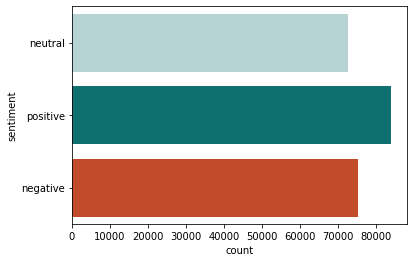

In [ ]:
import seaborn as sns
sns.countplot(y = 'sentiment', 
              data = clean_data_1, 
              palette = ['#b2d8d8',"#008080", '#db3d13'])
